In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Reshape
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load dataset
data = pd.read_csv('/content/housing.csv')

In [12]:
# Step 1: Prepare Features and Target Variable
X = data.drop('MedHouseVal', axis=1).values  # Features
y = data['MedHouseVal'].values  # Target variable


In [13]:
# Step 2: Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
# Step 3: Padding features to fit 3x3 dimensions
if X.shape[1] < 9:
    padding = 9 - X.shape[1]
    X = np.pad(X, ((0, 0), (0, padding)), 'constant')
X_reshaped = X.reshape(-1, 3, 3, 1)  # Reshape to (samples, height, width, channels)

In [15]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


In [16]:
# Step 5: Build CNN Model
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(3, 3, 1)),
    BatchNormalization(),
    Conv2D(64, (2, 2), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Regression output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Step 6: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.6674 - mae: 0.5922 - val_loss: 0.5307 - val_mae: 0.4866
Epoch 2/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6085 - mae: 0.5660 - val_loss: 0.5808 - val_mae: 0.4775
Epoch 3/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5474 - mae: 0.5354 - val_loss: 0.5353 - val_mae: 0.4694
Epoch 4/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5759 - mae: 0.5468 - val_loss: 0.4867 - val_mae: 0.4554
Epoch 5/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5381 - mae: 0.5289 - val_loss: 0.5288 - val_mae: 0.4722
Epoch 6/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5569 - mae: 0.5345 - val_loss: 0.6211 - val_mae: 0.4873
Epoch 7/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5333 - mae: 0.5270 - val_loss: 0.6450 - val_mae: 0.4632
Epoch 8/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5077 - mae: 0.5159 - val_loss: 1.3178 - val_mae: 0.4924
Epoch 9/20
1032/1032 ━━━━━━━━━━━━━━━━━━━

In [20]:
# Step 8: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4738 - mae: 0.4476
Test Mean Absolute Error: 0.45


In [21]:
# Step 9: Make predictions
y_pred = model.predict(X_test).flatten()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
# Step 10: Binary classification of predictions based on median threshold
y_pred_binary = (y_pred > np.median(y_test)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

In [23]:
# Step 11: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = np.mean(y_pred_binary == y_test_binary)

In [24]:
print(f"\nMean Squared Error: {mse:.2f}")
print(f"\nMean Absolute Error: {mae:.2f}")
print(f"\nR2 Score: {r2:.2f}")
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Mean Squared Error: 0.83

Mean Absolute Error: 0.45

R2 Score: 0.37

Accuracy: 82.70%


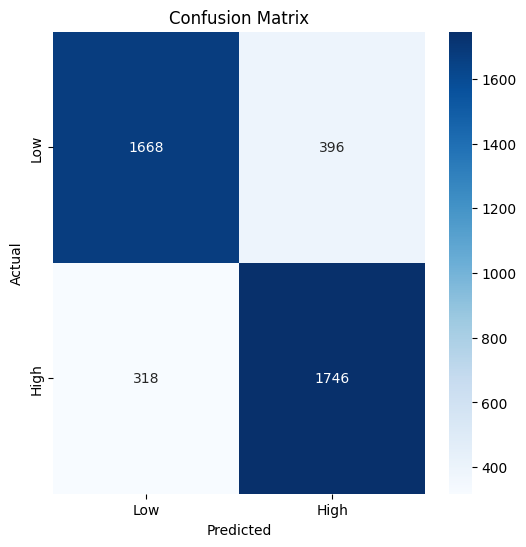

In [25]:
# Step 12: Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

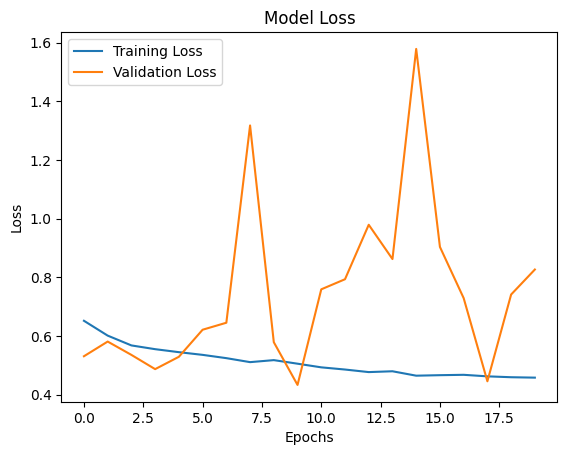

In [26]:
# Step 13: Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

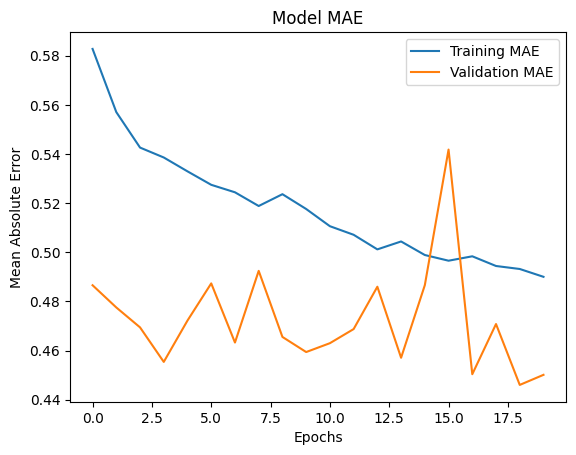

In [27]:
# Step 14: Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Model MAE')
plt.show()